In [2]:
from IPython import get_ipython
from IPython.display import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import (train_test_split, KFold, StratifiedKFold, cross_val_score, RepeatedStratifiedKFold, cross_val_predict)
from sklearn.metrics import (accuracy_score, roc_auc_score, roc_curve, auc,mean_squared_error, r2_score, classification_report,confusion_matrix, RocCurveDisplay)
from sklearn.feature_selection import (VarianceThreshold, f_classif, f_regression,SelectKBest, SelectPercentile, mutual_info_classif, mutual_info_regression,SelectFromModel, RFE)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, label_binarize
from sklearn.decomposition import PCA

from sklearn.ensemble import (BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier)

from sklearn.naive_bayes import (GaussianNB, MultinomialNB, BernoulliNB, ComplementNB)

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC, LinearSVC

from sklearn.linear_model import (LinearRegression, LogisticRegression,Lasso, SGDClassifier, RidgeClassifier)

from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis as QDA)

from sklearn.neural_network import MLPClassifier

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from scipy.interpolate import interp1d

In [3]:
Data1=pd.read_csv('data.csv')

Data= Data1.copy()
X=Data.iloc[: ,3:] #selecting from 3rd column of the dataset for input X


In [4]:
scaler = StandardScaler()
# transform data
X=scaler.fit_transform(X)



In [5]:

y=pd.DataFrame(Data.iloc[:,2]).values.ravel() #selecting the 2nd column from original dataset and convert in into a 1D array with revel.
#ravel is needed becuz mosly when we just extract cols from dataset, its a 2d-array with 1 cols. So we want to make it 1D array

y[y==1]=0 #setting the target values as 0 and 1
y[y==11]=1

In [6]:
y.shape


(900,)

In [7]:
X=pd.DataFrame(X)
X.columns = Data.iloc[:,3:].columns #setting col. names of X from the original dataset cols

In [8]:
X #900 rows × 16381 columns

,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,NCRNA00110,MED14,OR51A7,WT1,RNF24,MED15,ZIC5,MED16,HCG27,CYP2A13
0,-0.839980,-1.129783,-0.375675,-1.193959,0.234793,0.685876,-1.527906,-0.522317,0.766642,0.342223,...,1.506583,0.258129,-0.060918,-0.644444,-0.428574,0.432839,-0.627785,1.134207,0.593407,3.048374
1,-0.147722,0.292352,1.488801,-1.205101,-1.153395,-0.917668,1.707724,-1.086026,2.019639,0.103583,...,-0.410548,-0.745341,-0.060918,0.722275,0.216982,-0.911920,0.460763,-2.179833,-0.386341,-0.446711
2,0.476358,1.118924,5.074882,-0.200806,0.133483,-0.110504,0.271179,1.356047,-0.675352,-0.540995,...,1.267511,-1.148418,-0.060918,-0.347397,-1.338820,-0.037710,0.365490,0.495122,0.727244,-0.446711
3,-1.465536,0.138032,-0.375675,-1.028935,0.674968,0.067022,-0.470656,0.500780,-0.675352,-0.367522,...,0.671411,-0.018569,-0.060918,-0.475502,1.266204,-1.455920,-0.201505,-0.513079,-1.543297,-0.446711
4,-0.433421,-0.906708,-0.375675,0.341544,0.758443,-0.343196,1.081500,-1.771539,-0.675352,-0.606808,...,1.895094,0.019803,-0.060918,0.059372,-0.543218,-0.283039,-0.627785,-0.336520,0.856782,-0.446711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,-0.863149,-0.210119,-0.375675,1.213640,-1.418162,-1.130036,0.602722,-1.056277,-0.675352,0.077682,...,1.574312,-2.405880,-0.060918,0.978523,-0.386158,2.729493,-0.627785,-0.370172,1.249885,-0.446711
896,0.403162,0.770201,1.904765,-0.338125,-0.566863,-0.340707,0.234946,0.286362,-0.675352,0.095932,...,0.199429,-0.190713,-0.060918,1.478802,-0.374760,1.417120,-0.627785,0.293662,1.220844,-0.081548
897,1.269554,0.892618,-0.375675,0.879678,-0.621839,-0.979055,-0.249278,0.261985,-0.675352,0.231798,...,-0.553878,-0.311636,-0.060918,0.912910,0.828781,0.743364,1.926373,0.149397,0.735077,-0.446711
898,0.709078,-0.365258,-0.375675,0.497534,-0.618529,-0.980922,-0.120263,2.122467,-0.675352,-0.249723,...,1.451178,-2.080954,-0.060918,0.147287,-0.973735,0.745692,-0.627785,1.538483,0.770805,-0.446711


In [9]:
X.isna().sum()

,0
ARHGEF10L,0
HIF3A,0
RNF17,0
RNF10,0
RNF11,0
...,...
MED15,0
ZIC5,0
MED16,0
HCG27,0


In [10]:
nan_cols = X.columns[X.isna().any()].tolist() #list of columns with NaN
print(nan_cols)

[]


In [11]:
X.dtypes.unique()

array([dtype('float64')], dtype=object)

# **Feature selection**

1. ANOVA
2. MUTUAL INFO
3. EXTRA TREE CLASSIFIER
4. LOGISTIC REGRESSION

### 1. **ANOVA**

In [12]:
#ANOVA

selector = SelectKBest(f_classif, k=100) #top 100 features selected from Anova
selector.fit_transform(X, y)
X_anv_support = selector.get_support()
X_new_anov = X.loc[:,X_anv_support].columns.tolist()
print(str(len(X_new_anov)), 'selected features')
print(X_new_anov)

100 selected features
['HIF3A', 'EFHA2', 'LHCGR', 'LOC729467', 'PDK4', 'C3orf50', 'ADH4', 'C16orf59', 'PALMD', 'LLGL2', 'SLC22A12', 'EBF3', 'EBF1', 'PCK1', 'SLC22A3', 'LHFP', 'LMX1A', 'PDE3B', 'GLYAT', 'APOB', 'CCDC50', 'SDPR', 'PYCR1', 'GNG11', 'CCDC3', 'CAV2', 'CAV1', 'KCNA4', 'KLHL31', 'GPR146', 'AQPEP', 'FIGF', 'PRHOXNB', 'NAALAD2', 'HSPB6', 'LOC283392', 'KCNIP2', 'KIF4A', 'TRHDE', 'LOC572558', 'TNS1', 'GPAM', 'MEOX2', 'PPAP2A', 'MMD', 'SORBS1', 'AOC3', 'NR5A2', 'FERMT2', 'SH3D19', 'CA4', 'HSPB7', 'MYOM1', 'MYCT1', 'MESTIT1', 'GLP2R', 'IGSF10', 'NMT2', 'LOC55908', 'MYOC', 'LGALS12', 'ABCB5', 'ADH1A', 'CLEC4GP1', 'AQP7P3', 'AQP7P1', 'ABCD2', 'LRRC70', 'CD300LG', 'LYVE1', 'LOC201651', 'ADRA1A', 'HEPN1', 'EPB42', 'HEPACAM', 'PKMYT1', 'SLC19A3', 'CCDC64', 'ANGPTL5', 'LRRN3', 'LEPR', 'GNAI1', 'HSD17B13', 'FAM107A', 'TNMD', 'LOC145820', 'PCOLCE2', 'ACVR1C', 'WDR62', 'LPL', 'MRAP', 'CLEC4G', 'CPA1', 'LIFR', 'SCN11A', 'RDH5', 'CD36', 'MASP1', 'DMGDH', 'PALM2-AKAP2']


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   41   144   283   284   297   321   365   565   732   824   825   839
  1077  1100  1188  1255  1256  1259  1338  1363  1367  1399  1425  1430
  1461  1619  1655  1743  1766  1891  1993  1994  2003  2031  2032  2224
  2225  2231  2236  2248  2252  2409  2476  2691  2693  2698  2699  2733
  2889  2903  3039  3048  3049  3076  3078  3079  3273  3284  3288  3425
  3463  3895  3994  4036  4050  4051  4052  4135  4933  5009  5033  5242
  5299  5371  5390  5418  5439  5606  5607  5609  5645  5648  5755  6030
  6049  6051  6118  6125  6147  6323  6324  6825  6852  6855  6856  7207
  7218  7357  7403  7420  7421  7440  7602  7800  7857  7858  7913  8000
  8025  8107  8565  9029  9200  9305  9485  9621  9625  9666  9755 10262
 10315 10458 10464 10502 10527 10528 10585 10605 10608 10668 10690 10958
 10959 10962 10963 10964 10965 10966 10996 10999 11124 11125 11192 11372
 11776

In [13]:
print(pd.DataFrame(X_new_anov))

              0
0         HIF3A
1         EFHA2
2         LHCGR
3     LOC729467
4          PDK4
..          ...
95         RDH5
96         CD36
97        MASP1
98        DMGDH
99  PALM2-AKAP2

[100 rows x 1 columns]


# **2. Mutual Information**

In [14]:
##################
#MUTUAL INFORMATION


sel = SelectPercentile(mutual_info_classif,
  percentile=0.5).fit(X, y)  #BUT selcting from top MI values mean high correlation?

tedad_feature=len(X.columns[sel.get_support()])
X_new_mi = sel.transform(X)
X_new_mi=pd.DataFrame(X_new_mi)

X_mi_support = sel.get_support()
X_new_mi = X.loc[:,X_mi_support].columns.tolist()
print(str(len(X_new_mi)), 'selected features')
print(X_new_mi)

82 selected features
['ITGA7', 'HLF', 'PAMR1', 'PDK4', 'GOLGA8G', 'ADH6', 'NRN1', 'SLC23A2', 'ATOH8', 'GPR123', 'KCNAB1', 'WSCD2', 'H2AFX', 'NKX3-2', 'GPR62', 'DDX41', 'FLJ36031', 'TMC2', 'HBP1', 'AURKB', 'CAV2', 'NR3C1', 'FAM128B', 'TMEM88', 'AQPEP', 'CLEC5A', 'FAM13A', 'TCP11', 'LCA5', 'SGOL2', 'CYP2F1', 'ISCU', 'VIM', 'JAM3', 'KIF4B', 'ATF7', 'MME', 'FAM171A1', 'SDS', 'HIST1H2BO', 'FERMT2', 'KLC2', 'GHR', 'FBLN5', 'GIMAP6', 'MYOM1', 'FBXO3', 'KLRF1', 'TAL1', 'LIG3', 'KIAA0408', 'SFXN4', 'MAP6', 'LOC286367', 'AQP7P1', 'RHBG', 'CD300LG', 'TBRG4', 'PPP1R3G', 'EPB49', 'TOMM40', 'RCBTB2', 'RBM28', 'SLC19A3', 'PPP1R1B', 'C6orf129', 'PYGM', 'TMBIM1', 'MMRN1', 'LOC90586', 'C5orf4', 'MARS', 'HES4', 'KLHL29', 'CCNDBP1', 'MRAP', 'AATK', 'LOXL4', 'TMED3', 'BVES', 'PLIN1', 'FXYD1']


# **3. Extra tree classifier**

In [15]:

#ExtraTreesClassifier

sel2 = ExtraTreesClassifier(n_estimators=2,max_features=1500, random_state=0)
sel2.fit(X, y)
sel2.feature_importances_
model = SelectFromModel(sel2, prefit=True)
X_new_et = pd.DataFrame(model.transform(X))

X_et_support = model.get_support()
X_new_et = X.loc[:,X_et_support].columns.tolist() # also changed X_mi_support to X_et_support
print(str(len(X_new_et)), 'selected features')
print(X_new_et)

173 selected features
['RNF112', 'GRIN1', 'GHDC', 'IL1RAPL2', 'ERGIC1', 'MRPL27', 'DMD', 'TMEM123', 'LRRC24', 'LRRC29', 'PIGC', 'PRDM10', 'VOPP1', 'LMBR1L', 'MYH7B', 'SNORA65', 'MRPL34', 'ZMYND8', 'SLC35E2', 'KC6', 'CNR1', 'QARS', 'ZNF117', 'LOC285627', 'LGI4', 'TCP10', 'XRCC4', 'KCNA4', 'C10orf95', 'SLC26A10', 'ZMAT1', 'HBBP1', 'SERPINB7', 'ATP8B3', 'CCDC81', 'HTR2A', 'GPR142', 'NCRNA00204B', 'RPS17', 'MBD3', 'NAALAD2', 'EDAR', 'B4GALT4', 'RFX2', 'ARNTL2', 'AMBN', 'TSPAN31', 'VPS26A', 'BACH1', 'PAK6', 'PPA1', 'TMEM173', 'SH3PXD2B', 'SELENBP1', 'CYTH3', 'PSAPL1', 'IHH', 'DNAJC28', 'AMHR2', 'C9orf27', 'SCARNA20', 'IL1RN', 'SMARCAD1', 'FLJ42627', 'SCRT2', 'ANKRD36B', 'OR5B2', 'HEXB', 'ZNF383', 'LAMC2', 'TRPV5', 'CTSE', 'UBA5', 'PARS2', 'FAM75A3', 'SEC23B', 'HCG18', 'SP9', 'USP14', 'SPANXN1', 'PAPPA', 'CCDC142', 'C20orf111', 'MT1B', 'RANBP3', 'CN5H6.4', 'FBXO2', 'LCE2A', 'LCE2D', 'GLYATL3', 'COG2', 'C1QL2', 'MGAT2', 'MFAP5', 'TRAK1', 'PIWIL2', 'SNCAIP', 'SPEF2', 'NCAPH', 'HERC4', 'GALNT12

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


# **4. Logistic regression**

In [16]:

#  LGR
sel3 = SelectFromModel(LogisticRegression(C =0.08,random_state=0,
penalty = 'l1', solver = 'liblinear'))
sel3.fit(X,y)
# print(X.columns[col_index])
X_new_lg =pd.DataFrame( sel.transform(X))
X_new_lg=X_new_lg .to_numpy()
col_index = sel3.get_support()

X_lg_support = sel3.get_support()
X_new_lg = X.loc[:,X_lg_support].columns.tolist()
print(str(len(X_new_lg)), 'selected features')
print(X_new_lg)


191 selected features
['OVCH1', 'TMEM212', 'SNORD115-13', 'ATP1A4', 'FRG2', 'CFHR4', 'ZCCHC13', 'FLJ46361', 'LY6G6E', 'ZNF323', 'KRT28', 'KRT25', 'LPPR5', 'C10orf99', 'PRKACG', 'SULT2A1', 'GRIN2C', 'EN2', 'GBA2', 'CUX2', 'SNORA66', 'TAS2R8', 'FNDC7', 'SLC22A13', 'CCDC73', 'CCDC70', 'OR2F1', 'CLEC18A', 'CRYGA', 'BLMH', 'SNORA49', 'CXorf40A', 'CSN1S2A', 'SPINK13', 'GLYAT', 'OR2B2', 'CABP2', 'LOC415056', 'MBOAT1', 'EIF1', 'S100A5', 'PWRN1', 'VCAM1', 'TEX12', 'TRIML1', 'FAM170A', 'LRRC39', 'DNAJC25-GNG10', 'KCNA4', 'FAM106A', 'OR2T10', 'LOC100216001', 'REG1B', 'CDX4', 'NKX2-6', 'DPPA5', 'LOC154449', '01-Dec', 'TSPAN16', 'CCDC13', 'CLDN1', 'C4orf22', 'PYDC2', 'PRHOXNB', 'G6PC', 'TSPAN33', 'GTF2A1L', 'PPIAL4B', 'ZSWIM2', 'SCLY', 'KRTAP19-5', 'VAPA', 'KIF4B', 'CETN4P', 'WDR75', 'OR4C12', 'C10orf50', 'SHISA2', 'ASCL3', 'OSTN', 'HEMGN', 'KRTAP13-1', 'GATSL2', 'LOC641367', 'C21orf54', 'TFAMP1', 'USP36', 'ITLN1', 'HIGD2B', 'LOC100132354', 'DEFB108B', 'HIST1H3B', 'LOC644669', 'UBA5', 'RPRML', 'CFC

In [17]:
# Convert the lists to sets before performing the intersection.
common_features = list(set(X_new_anov).intersection(X_new_mi, X_new_et, X_new_lg))
# Convert the result back to a list if needed.

In [18]:
print(f"Number of common features: {len(common_features)}")
print("Common features:", list(common_features))

Number of common features: 0
Common features: []


In [19]:
X_anov_df = X[X_new_anov]
X_et_df = X[X_new_et]
X_lg_df = X[X_new_lg]
X_mi_df = X[X_new_mi]

In [20]:
X_mi_df

,ITGA7,HLF,PAMR1,PDK4,GOLGA8G,ADH6,NRN1,SLC23A2,ATOH8,GPR123,...,HES4,KLHL29,CCNDBP1,MRAP,AATK,LOXL4,TMED3,BVES,PLIN1,FXYD1
0,-0.128135,-1.512433,-0.725607,-0.244757,-0.172590,-0.061165,-0.773729,1.030632,-0.867594,-0.477509,...,0.431178,-1.401493,0.184390,-0.313971,1.138771,-1.337906,0.031650,-0.928244,0.248169,-0.771830
1,0.428566,-0.379386,-0.339120,0.698723,-0.647088,0.577207,0.856955,0.508093,1.398430,0.067374,...,0.083443,0.011065,0.631434,0.388132,-0.404512,0.607253,0.566016,0.875349,0.197672,-0.733395
2,1.115311,1.742580,2.365019,2.130956,3.938046,0.727249,1.257393,0.180381,1.987298,1.512634,...,0.361497,1.686184,0.762104,1.350755,0.583826,1.237416,-0.349579,1.079583,0.908188,1.475092
3,0.726810,0.652321,0.532111,0.586731,-0.031813,-0.795826,0.482248,0.334765,0.229806,0.140465,...,-1.626528,0.472694,0.222367,1.046423,-1.662476,0.165484,1.176652,0.224511,0.908188,0.709602
4,-0.924926,-0.774110,-0.515953,-0.647461,0.518290,-0.795826,-1.009207,-0.241519,-0.593320,1.406685,...,-0.155311,-0.851664,0.673596,-0.833281,-2.146479,0.174452,0.401044,-0.705224,-1.240092,-0.327940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.146531,-0.519585,-0.539491,0.359186,0.460073,-0.795826,-0.649522,-0.907154,0.245964,-0.477509,...,1.280966,0.041947,-2.276288,-0.494930,-0.604375,-0.726486,0.815028,-1.265919,0.262316,0.660247
896,1.198359,0.606993,0.188082,1.799275,-0.647088,0.453709,0.524462,0.410948,1.512791,-0.477509,...,1.154010,0.345026,0.631113,0.966516,1.251558,0.047281,-0.565238,-0.080993,1.226639,1.025067
897,1.582545,0.529611,0.320428,2.096336,0.588743,0.618299,0.355538,-0.098691,1.458480,-0.477509,...,0.254460,1.101334,0.131124,2.014652,-0.409374,0.763048,-0.306303,0.393348,1.485358,0.776207
898,0.669919,0.866597,0.427665,-0.734652,0.223082,-0.795826,0.229870,-0.785825,0.967564,-0.477509,...,1.551374,0.571517,0.786243,-0.290611,0.194782,0.843873,0.620290,-0.218143,-0.447200,0.899383


In [21]:
print(X.columns[sel.get_support()])

Index(['ITGA7', 'HLF', 'PAMR1', 'PDK4', 'GOLGA8G', 'ADH6', 'NRN1', 'SLC23A2',
       'ATOH8', 'GPR123', 'KCNAB1', 'WSCD2', 'H2AFX', 'NKX3-2', 'GPR62',
       'DDX41', 'FLJ36031', 'TMC2', 'HBP1', 'AURKB', 'CAV2', 'NR3C1',
       'FAM128B', 'TMEM88', 'AQPEP', 'CLEC5A', 'FAM13A', 'TCP11', 'LCA5',
       'SGOL2', 'CYP2F1', 'ISCU', 'VIM', 'JAM3', 'KIF4B', 'ATF7', 'MME',
       'FAM171A1', 'SDS', 'HIST1H2BO', 'FERMT2', 'KLC2', 'GHR', 'FBLN5',
       'GIMAP6', 'MYOM1', 'FBXO3', 'KLRF1', 'TAL1', 'LIG3', 'KIAA0408',
       'SFXN4', 'MAP6', 'LOC286367', 'AQP7P1', 'RHBG', 'CD300LG', 'TBRG4',
       'PPP1R3G', 'EPB49', 'TOMM40', 'RCBTB2', 'RBM28', 'SLC19A3', 'PPP1R1B',
       'C6orf129', 'PYGM', 'TMBIM1', 'MMRN1', 'LOC90586', 'C5orf4', 'MARS',
       'HES4', 'KLHL29', 'CCNDBP1', 'MRAP', 'AATK', 'LOXL4', 'TMED3', 'BVES',
       'PLIN1', 'FXYD1'],
      dtype='object')


In [22]:
print(len(X.columns[sel.get_support()])) #no. of key features selected after feature selction procedure

82


## **Feature extraction (PCA)**

In [23]:
pca = PCA(n_components=100, random_state=42)
pca.fit(X)
X_new_pca = pd.DataFrame(pca.transform(X))
X_new_pca_arr=X_new_pca .to_numpy()



In [24]:
counter = Counter(y) #printing the counts of each unique target in our dataset
print(counter)

Counter({0: 762, 1: 138})


In [25]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [26]:
y

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,

## **ML models tested without SMOTE**

                     Model         Feature Set  Balanced Accuracy       AUC
0       LogisticRegression               ANOVA           0.560440  0.523477
1   DecisionTreeClassifier               ANOVA           0.534216  0.534216
2   RandomForestClassifier               ANOVA           0.599151  0.601399
3       LogisticRegression  Mutual Information           0.544456  0.531219
4   DecisionTreeClassifier  Mutual Information           0.514985  0.514985
5   RandomForestClassifier  Mutual Information           0.544705  0.673452
6       LogisticRegression         Extra Trees           0.556943  0.639111
7   DecisionTreeClassifier         Extra Trees           0.604645  0.604645
8   RandomForestClassifier         Extra Trees           0.531968  0.713786
9       LogisticRegression                 LGR           0.820180  0.965285
10  DecisionTreeClassifier                 LGR           0.608142  0.608142
11  RandomForestClassifier                 LGR           0.551199  0.805944


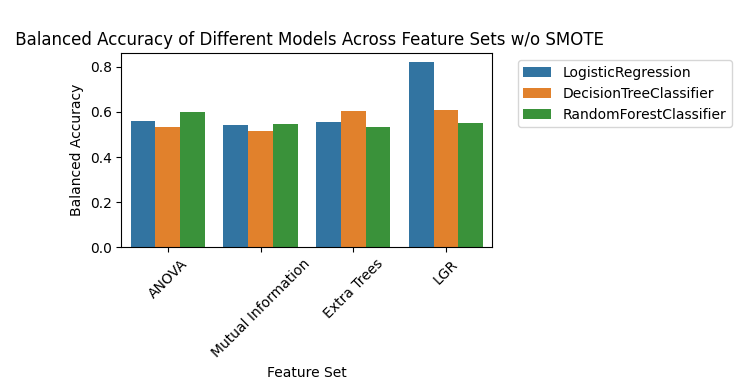

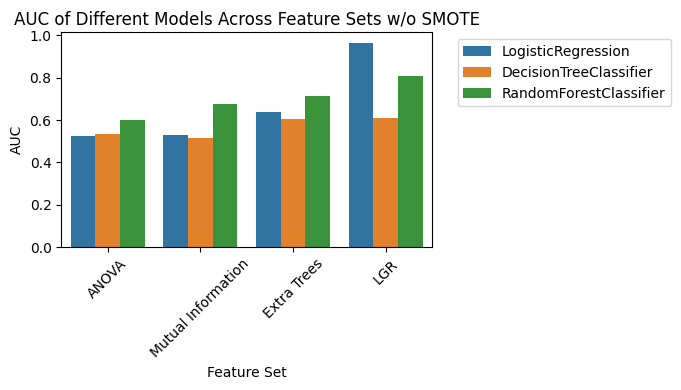

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold  # Added import for StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns




# Define ML models
lr = LogisticRegression()
dtree = DecisionTreeClassifier()
rf_fit = RandomForestClassifier(n_estimators=20, criterion="gini",
                                 min_samples_split=2, bootstrap=True,
                                 max_features='sqrt', random_state=42,
                                 min_samples_leaf=1)

models = [lr, dtree, rf_fit]
data_fe = [X_anov_df, X_mi_df, X_et_df, X_lg_df] # Updated to use X_lg_df based on the traceback info
# Include all feature sets
feature_set_names = ["ANOVA", "Mutual Information", "Extra Trees",
                      "LGR"]

# StratifiedKFold for cross-validation
num_folds = 5
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True,
                                   random_state=42)

# Store results
results = []


for i, data_fe_item in enumerate(data_fe):
  X_train, X_test, y_train, y_test = train_test_split(data_fe_item, y, test_size=0.2, random_state=42)
  Feature_Set= feature_set_names[i]

  # Training and evaluation of models
  for model_item in models:  # Changed to model_item to avoid shadowing

    model_name = model_item.__class__.__name__  # Updated to use model_item
    model = model_item  # Updated to use model_item
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    balanced_accuracy = (sensitivity + specificity) / 2
    auc_score = roc_auc_score(y_test, y_proba)

    # Store results for this model, including a placeholder for Feature Set
    results.append([model_name, Feature_Set, balanced_accuracy, auc_score])  # Placeholder for Feature Set

# Create DataFrame for results
results_df = pd.DataFrame(results, columns=["Model", "Feature Set", "Balanced Accuracy", "AUC"])

# Print results summary
print(results_df)

plt.figure(figsize=(7, 4))
sns.barplot(x="Feature Set", y="Balanced Accuracy", hue="Model", data=results_df)
plt.title(" \n Balanced Accuracy of Different Models Across Feature Sets w/o SMOTE")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
sns.barplot(x="Feature Set", y="AUC", hue="Model", data=results_df)
plt.title("AUC of Different Models Across Feature Sets w/o SMOTE")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout()
plt.show()

## **Implementation of ML models with SMOTE**

                     Model         Feature Set  Balanced Accuracy       AUC
0       LogisticRegression               ANOVA           0.507742  0.500500
1   DecisionTreeClassifier               ANOVA           0.530719  0.530719
2   RandomForestClassifier               ANOVA           0.566683  0.632243
3       LogisticRegression  Mutual Information           0.562188  0.532218
4   DecisionTreeClassifier  Mutual Information           0.572428  0.572428
5   RandomForestClassifier  Mutual Information           0.579670  0.719406
6       LogisticRegression         Extra Trees           0.578671  0.627123
7   DecisionTreeClassifier         Extra Trees           0.553197  0.553197
8   RandomForestClassifier         Extra Trees           0.595654  0.608017
9       LogisticRegression                 LGR           0.820180  0.964535
10  DecisionTreeClassifier                 LGR           0.595155  0.595155
11  RandomForestClassifier                 LGR           0.631119  0.735265


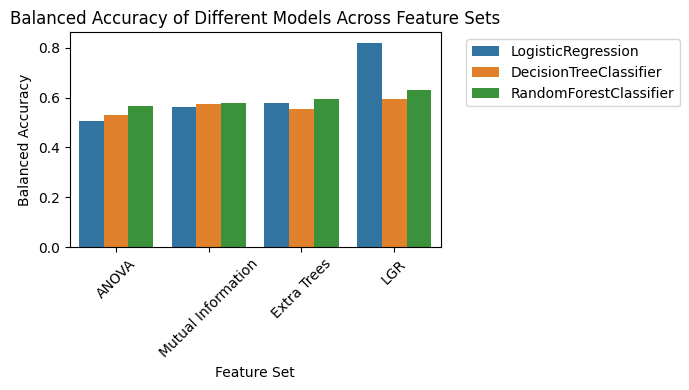

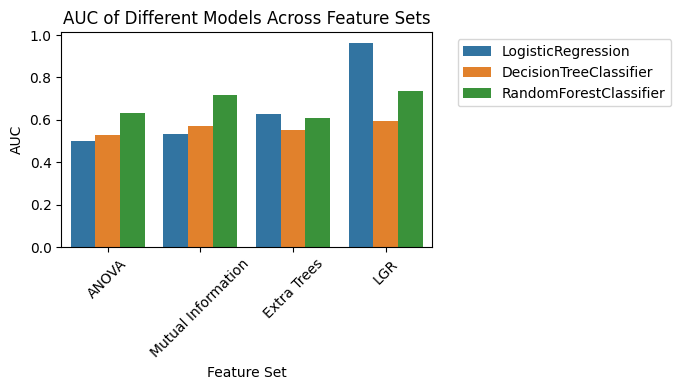

In [28]:


# Define ML models
lr = LogisticRegression()
dtree = DecisionTreeClassifier()
rf_fit = RandomForestClassifier(n_estimators=20, criterion="gini",
                                 min_samples_split=2, bootstrap=True,
                                 max_features='sqrt', random_state=42,
                                 min_samples_leaf=1)

models = [lr, dtree, rf_fit]
data_fe = [X_anov_df, X_mi_df, X_et_df, X_lg_df]  # Feature sets
feature_set_names = ["ANOVA", "Mutual Information", "Extra Trees", "LGR"]

# StratifiedKFold for cross-validation
num_folds = 5
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Store results
results = []

for i, data_fe_item in enumerate(data_fe):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_fe_item, y, test_size=0.2, random_state=42)
    Feature_Set = feature_set_names[i]

    # Apply SMOTE to oversample the minority class (solid tissue group)
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Apply RandomUnderSampler to undersample the majority class (breast cancer group)
    undersampler = RandomUnderSampler(random_state=42)
    X_train_final, y_train_final = undersampler.fit_resample(X_train_resampled, y_train_resampled)

    # Training and evaluation of models
    for model_item in models:
        model_name = model_item.__class__.__name__  # Get model name

        # Fit the model on the final resampled training data
        model_item.fit(X_train_final, y_train_final)

        # Predict on the test set
        y_pred = model_item.predict(X_test)
        y_proba = model_item.predict_proba(X_test)[:, 1]

        # Calculate metrics
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        balanced_accuracy = (sensitivity + specificity) / 2
        auc_score = roc_auc_score(y_test, y_proba)

        # Store results for this model and feature set
        results.append([model_name, Feature_Set, balanced_accuracy, auc_score])

# Create DataFrame for results
results_df = pd.DataFrame(results, columns=["Model", "Feature Set", "Balanced Accuracy", "AUC"])

# Print results summary
print(results_df)

plt.figure(figsize=(7, 4))
sns.barplot(x="Feature Set", y="Balanced Accuracy", hue="Model", data=results_df)
plt.title("Balanced Accuracy of Different Models Across Feature Sets")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
sns.barplot(x="Feature Set", y="AUC", hue="Model", data=results_df)
plt.title("AUC of Different Models Across Feature Sets")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout()
plt.show()

In [29]:
Counter(y_train_resampled) #as we can see SMOTE has sampled the values such that we get equal representations of both

Counter({0: 608, 1: 608})

## **PCA dataset (feature extracted) addition in models**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                     Model         Feature Set  Balanced Accuracy       AUC
0       LogisticRegression               ANOVA           0.507742  0.500500
1   DecisionTreeClassifier               ANOVA           0.520979  0.520979
2   RandomForestClassifier               ANOVA           0.566683  0.632243
3       LogisticRegression  Mutual Information           0.562188  0.532218
4   DecisionTreeClassifier  Mutual Information           0.610889  0.610889
5   RandomForestClassifier  Mutual Information           0.579670  0.719406
6       LogisticRegression         Extra Trees           0.578671  0.627123
7   DecisionTreeClassifier         Extra Trees           0.482517  0.482517
8   RandomForestClassifier         Extra Trees           0.595654  0.608017
9       LogisticRegression                 LGR           0.820180  0.964535
10  DecisionTreeClassifier                 LGR           0.588661  0.588661
11  RandomForestClassifier                 LGR           0.631119  0.735265
12      Logi

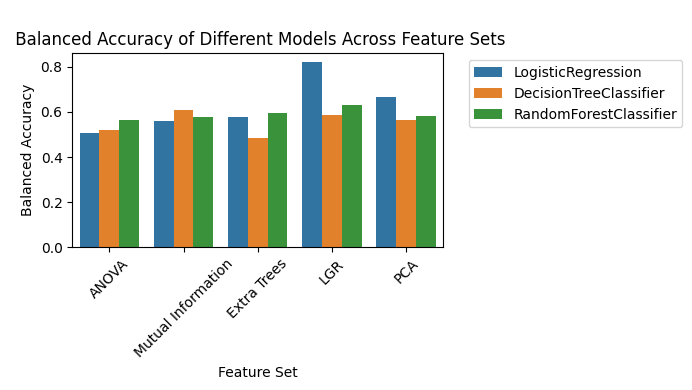

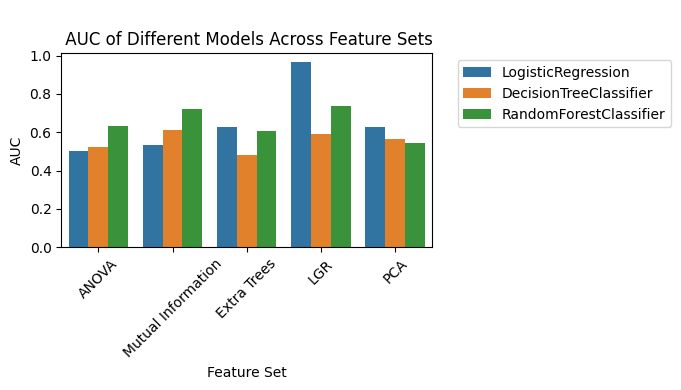

In [30]:


# Define ML models
lr = LogisticRegression()
dtree = DecisionTreeClassifier()
rf_fit = RandomForestClassifier(n_estimators=20, criterion="gini",
                                 min_samples_split=2, bootstrap=True,
                                 max_features='sqrt', random_state=42,
                                 min_samples_leaf=1)

models = [lr, dtree, rf_fit]
data_fe = [X_anov_df, X_mi_df, X_et_df, X_lg_df, X_new_pca]  # Feature sets
feature_set_names = ["ANOVA", "Mutual Information", "Extra Trees", "LGR", "PCA"]

# StratifiedKFold for cross-validation
num_folds = 5
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Store results
results = []

for i, data_fe_item in enumerate(data_fe):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_fe_item, y, test_size=0.2, random_state=42)
    Feature_Set = feature_set_names[i]

    # Apply SMOTE to oversample the minority class (solid tissue group)
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Apply RandomUnderSampler to undersample the majority class (breast cancer group)
    undersampler = RandomUnderSampler(random_state=42)
    X_train_final, y_train_final = undersampler.fit_resample(X_train_resampled, y_train_resampled)

    # Training and evaluation of models
    for model_item in models:
        model_name = model_item.__class__.__name__  # Get model name

        # Fit the model on the final resampled training data
        model_item.fit(X_train_final, y_train_final)

        # Predict on the test set
        y_pred = model_item.predict(X_test)
        y_proba = model_item.predict_proba(X_test)[:, 1]

        # Calculate metrics
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        balanced_accuracy = (sensitivity + specificity) / 2
        auc_score = roc_auc_score(y_test, y_proba)

        # Store results for this model and feature set
        results.append([model_name, Feature_Set, balanced_accuracy, auc_score])

# Create DataFrame for results
results_df = pd.DataFrame(results, columns=["Model", "Feature Set", "Balanced Accuracy", "AUC"])

accuracy_heat = results_df.pivot(index="Model", columns="Feature Set", values="Balanced Accuracy")
auc_heat = results_df.pivot(index="Model", columns="Feature Set", values="AUC")


# Print results summary
print(results_df)

plt.figure(figsize=(7, 4))
sns.barplot(x="Feature Set", y="Balanced Accuracy", hue="Model", data=results_df)
plt.title("\n Balanced Accuracy of Different Models Across Feature Sets")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
sns.barplot(x="Feature Set", y="AUC", hue="Model", data=results_df)
plt.title("\n AUC of Different Models Across Feature Sets")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout()
plt.show()




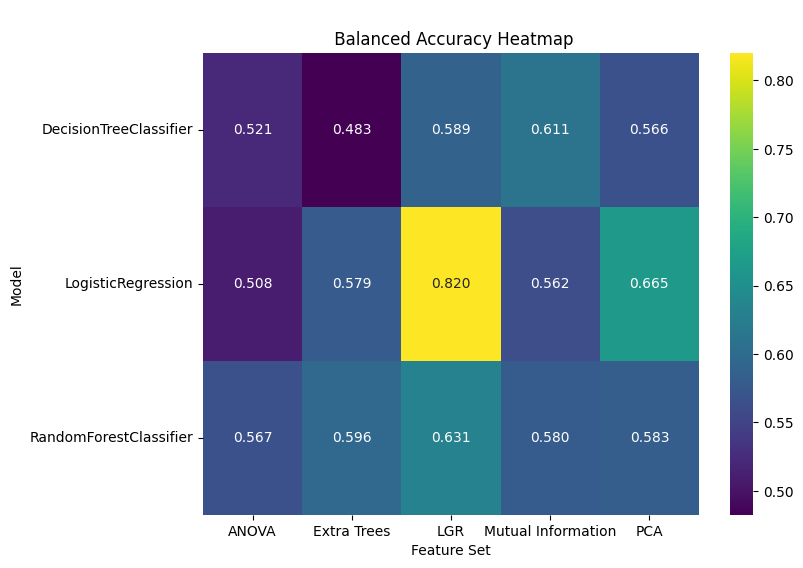

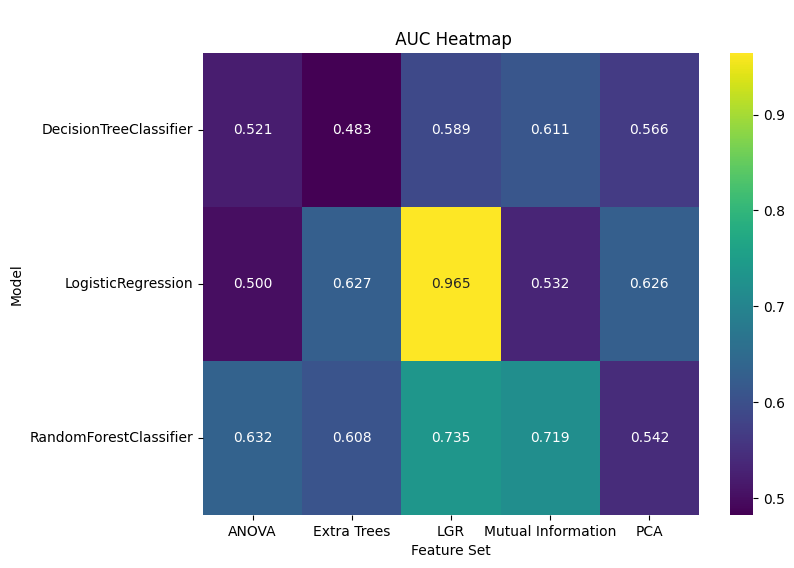

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(accuracy_heat, annot=True, cmap="viridis", fmt=".3f")
plt.title("\n Balanced Accuracy Heatmap")
plt.yticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(auc_heat, annot=True, cmap="viridis", fmt=".3f")
plt.title("\n AUC Heatmap")
plt.yticks(rotation=0)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

                     Model Feature Set  Balanced Accuracy       AUC
0       LogisticRegression       ANOVA           0.605664  0.624062
1   DecisionTreeClassifier       ANOVA           0.640523  0.640523
2   RandomForestClassifier       ANOVA           0.599129  0.656258
3       LogisticRegression       ANOVA           0.594771  0.651658
4   DecisionTreeClassifier       ANOVA           0.606754  0.606754
..                     ...         ...                ...       ...
70  DecisionTreeClassifier         PCA           0.521147  0.521147
71  RandomForestClassifier         PCA           0.549812  0.613839
72      LogisticRegression         PCA           0.537124  0.505169
73  DecisionTreeClassifier         PCA           0.482143  0.482143
74  RandomForestClassifier         PCA           0.537124  0.522791

[75 rows x 4 columns]


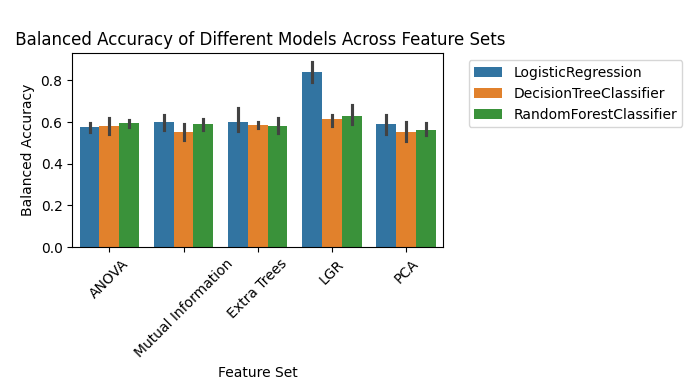

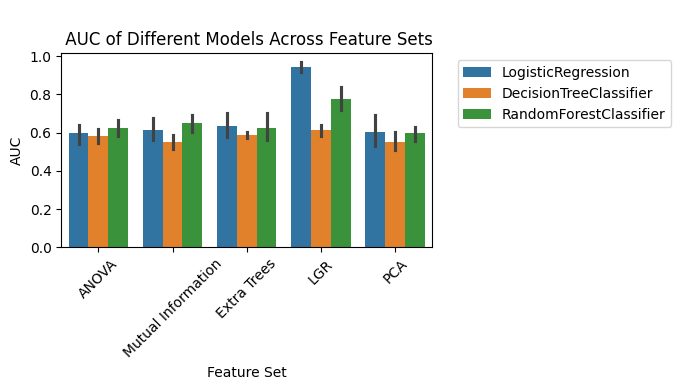

In [32]:


# Define ML models
lr = LogisticRegression()
dtree = DecisionTreeClassifier()
rf_fit = RandomForestClassifier(n_estimators=20, criterion="gini",
                                 min_samples_split=2, bootstrap=True,
                                 max_features='sqrt', random_state=42,
                                 min_samples_leaf=1)

models = [lr, dtree, rf_fit]
data_fe = [X_anov_df, X_mi_df, X_et_df, X_lg_df, X_new_pca]  # Feature sets
feature_set_names = ["ANOVA", "Mutual Information", "Extra Trees", "LGR", "PCA"]

# StratifiedKFold for cross-validation
num_folds = 5
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Store results
results = []

for i, data_fe_item in enumerate(data_fe):
    Feature_Set = feature_set_names[i]

    # Perform k-fold cross-validation
    for train_index, test_index in stratified_kfold.split(data_fe_item, y):
        X_train, X_test = data_fe_item.iloc[train_index], data_fe_item.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Apply SMOTE to oversample the minority class
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Apply RandomUnderSampler to undersample the majority class
        undersampler = RandomUnderSampler(random_state=42)
        X_train_final, y_train_final = undersampler.fit_resample(X_train_resampled, y_train_resampled)

        # Training and evaluation of models
        for model_item in models:
            model_name = model_item.__class__.__name__

            model_item.fit(X_train_final, y_train_final)
            y_pred = model_item.predict(X_test)
            y_proba = model_item.predict_proba(X_test)[:, 1]

            # Calculate metrics
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
            sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
            balanced_accuracy = (sensitivity + specificity) / 2
            auc_score = roc_auc_score(y_test, y_proba)

            results.append([model_name, Feature_Set, balanced_accuracy, auc_score])

# Create DataFrame for results
results_df2 = pd.DataFrame(results, columns=["Model", "Feature Set", "Balanced Accuracy", "AUC"])

# Use pivot_table with aggregation to avoid duplicate index error
accuracy_heat2 = results_df2.pivot_table(index="Model", columns="Feature Set", values="Balanced Accuracy", aggfunc='mean')
auc_heat2 = results_df2.pivot_table(index="Model", columns="Feature Set", values="AUC", aggfunc='mean')

# Print results summary
print(results_df2)

# Visualization of results for Balanced Accuracy and AUC
plt.figure(figsize=(7, 4))
sns.barplot(x="Feature Set", y="Balanced Accuracy", hue="Model", data=results_df2)
plt.title("\n Balanced Accuracy of Different Models Across Feature Sets")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
sns.barplot(x="Feature Set", y="AUC", hue="Model", data=results_df2)
plt.title("\n AUC of Different Models Across Feature Sets")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout()
plt.show()

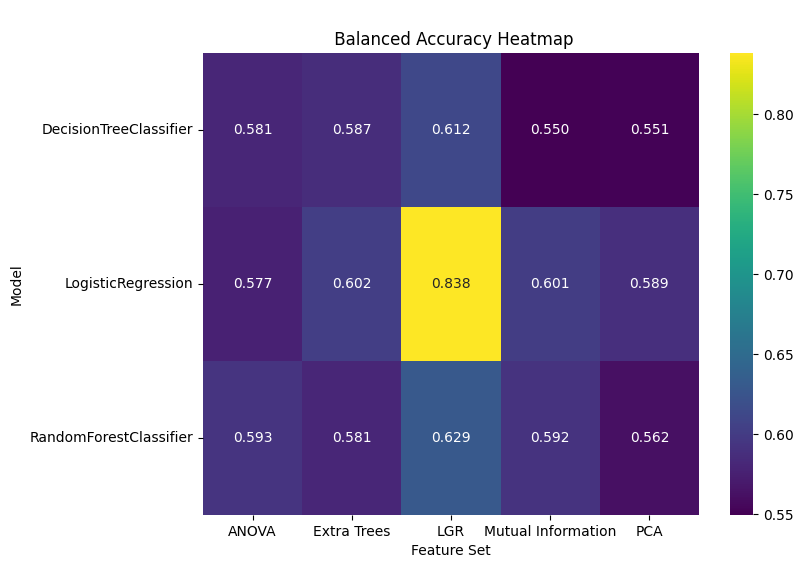

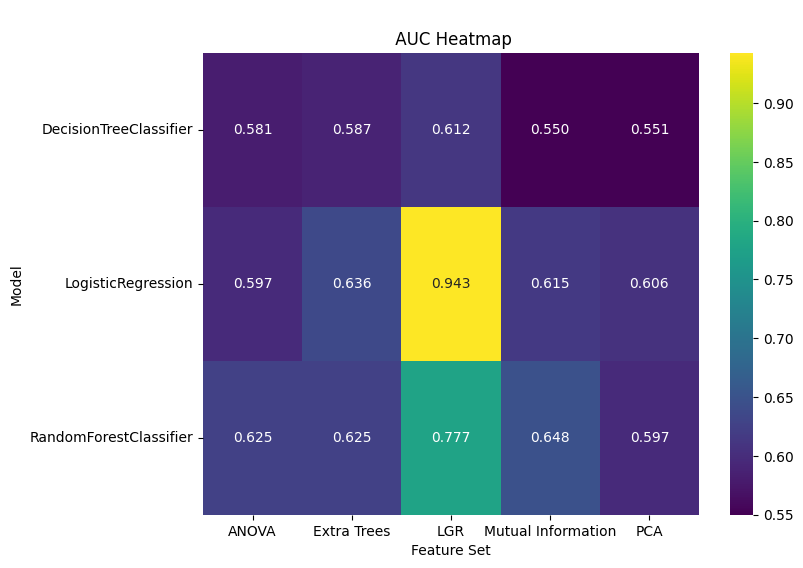

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(accuracy_heat2, annot=True, cmap="viridis", fmt=".3f")
plt.title("\n Balanced Accuracy Heatmap")
plt.yticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(auc_heat2, annot=True, cmap="viridis", fmt=".3f")
plt.title("\n AUC Heatmap")
plt.yticks(rotation=0)
plt.show()

# **FINAL TESTING WITH ALL MODELS AS MENTIONED IN THE PAPER**

In [34]:
# Define ML models
lr = LogisticRegression()
svm = SVC(probability=True)  # Enable probability estimates for AUC calculation
bagging = BaggingClassifier()
gnb = GaussianNB()
dtree = DecisionTreeClassifier()
gbdt = GradientBoostingClassifier()
knn = KNeighborsClassifier()
bnb = BernoulliNB()
rf_fit = RandomForestClassifier(n_estimators=50,
                                random_state=42)
adaboost = AdaBoostClassifier()
extratrees = ExtraTreesClassifier()
lda = LinearDiscriminantAnalysis()
mlp = MLPClassifier()  # Increase max_iter if needed

# Create a list of models
models = [lr, svm, bagging, gnb, dtree, gbdt, knn, bnb, rf_fit, adaboost, extratrees, lda, mlp]
data_fe = [X_anov_df, X_mi_df, X_et_df, X_lg_df, X_new_pca]  # Feature sets
feature_set_names = ["ANOVA", "Mutual Information", "Extra Trees", "LGR", "PCA"]

# StratifiedKFold for cross-validation
num_folds = 5
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Store results
results = []

for i, data_fe_item in enumerate(data_fe):
    Feature_Set = feature_set_names[i]

    # Perform k-fold cross-validation
    for train_index, test_index in stratified_kfold.split(data_fe_item, y):
        X_train, X_test = data_fe_item.iloc[train_index], data_fe_item.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Apply SMOTE to oversample the minority class
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Apply RandomUnderSampler to undersample the majority class
        undersampler = RandomUnderSampler(random_state=42)
        X_train_final, y_train_final = undersampler.fit_resample(X_train_resampled, y_train_resampled)

        # Training and evaluation of models
        for model_item in models:
            model_name = model_item.__class__.__name__

            model_item.fit(X_train_final, y_train_final)
            y_pred = model_item.predict(X_test)
            y_proba = model_item.predict_proba(X_test)[:, 1]

            # Calculate metrics
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
            sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
            balanced_accuracy = (sensitivity + specificity) / 2
            auc_score = roc_auc_score(y_test, y_proba)

            results.append([model_name, Feature_Set, balanced_accuracy, auc_score])

# Create DataFrame for results
results_df3 = pd.DataFrame(results, columns=["Model", "Feature Set", "Balanced Accuracy", "AUC"])

# Use pivot_table with aggregation to avoid duplicate index error
accuracy_heat3 = results_df3.pivot_table(index="Model", columns="Feature Set", values="Balanced Accuracy", aggfunc='mean')
auc_heat3 = results_df3.pivot_table(index="Model", columns="Feature Set", values="AUC", aggfunc='mean')



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemb

                          Model Feature Set  Balanced Accuracy       AUC
0            LogisticRegression       ANOVA           0.605664  0.624062
1                           SVC       ANOVA           0.613290  0.660373
2             BaggingClassifier       ANOVA           0.595861  0.748608
3                    GaussianNB       ANOVA           0.711329  0.783103
4        DecisionTreeClassifier       ANOVA           0.628540  0.628540
..                          ...         ...                ...       ...
320      RandomForestClassifier         PCA           0.569549  0.508224
321          AdaBoostClassifier         PCA           0.486842  0.507284
322        ExtraTreesClassifier         PCA           0.540414  0.478853
323  LinearDiscriminantAnalysis         PCA           0.559680  0.510573
324               MLPClassifier         PCA           0.591635  0.545113

[325 rows x 4 columns]


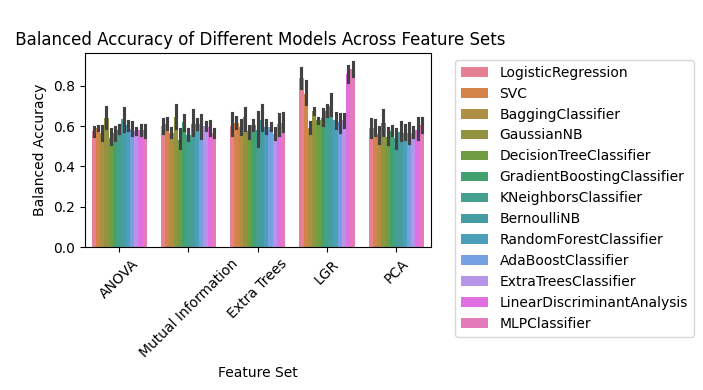

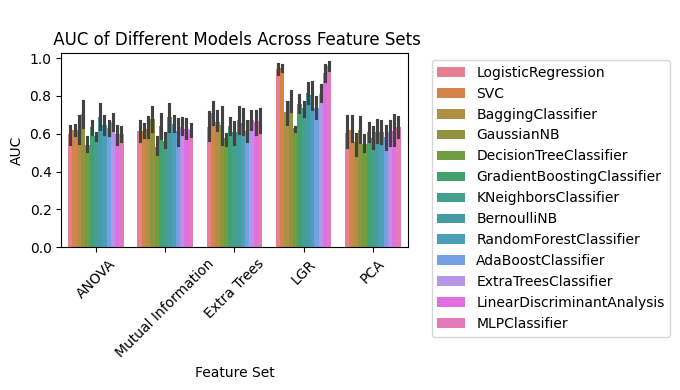

In [35]:
# Print results summary
print(results_df3)

# Visualization of results for Balanced Accuracy and AUC
plt.figure(figsize=(7, 4))
sns.barplot(x="Feature Set", y="Balanced Accuracy", hue="Model", data=results_df3)
plt.title("\n Balanced Accuracy of Different Models Across Feature Sets")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
sns.barplot(x="Feature Set", y="AUC", hue="Model", data=results_df3)
plt.title("\n AUC of Different Models Across Feature Sets")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout()
plt.show()

# **Heatmap for Balanced accuracy and AUC for all models**

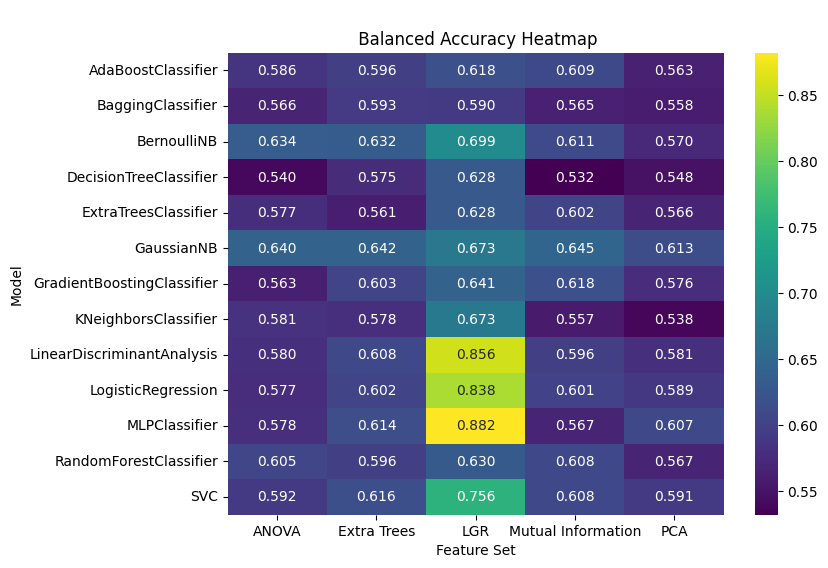

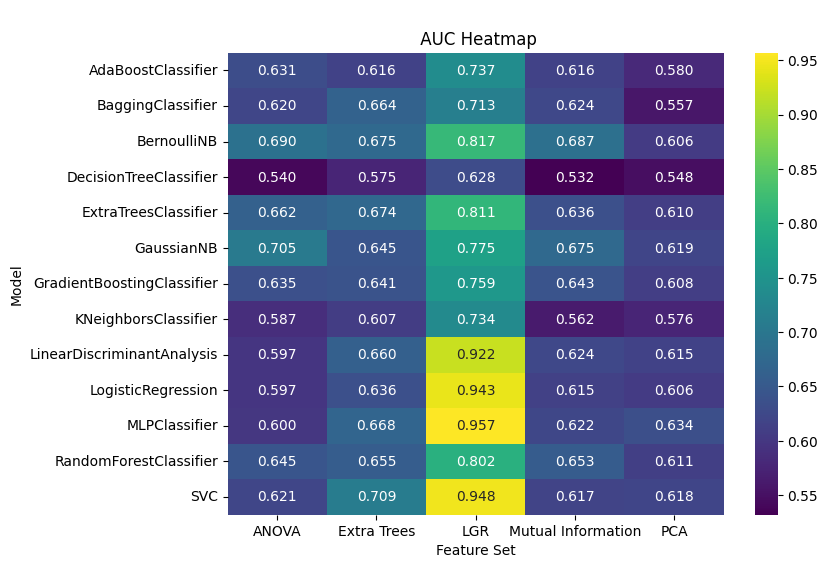

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(accuracy_heat3, annot=True, cmap="viridis", fmt=".3f")
plt.title("\n Balanced Accuracy Heatmap")
plt.yticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(auc_heat3, annot=True, cmap="viridis", fmt=".3f")
plt.title("\n AUC Heatmap")
plt.yticks(rotation=0)
plt.show()